# This Notebook, *GRIP_Task_6.ipynb*, has been created as a part of **Graduate Rotational Internship Program (GRIP - Nov 2020)** organised by **The Sparks Foundation**.


## **Task - 6: Prediction Using Decision Tree Algorithm**
### Q. Create the decision tree classifier and visualize it graphically for given dataset.
(Note: The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.)

### Decision Trees

Decision Tree algorithm belongs to the family of supervised learning algorithms. Unlike other supervised learning algorithms, the decision tree algorithm can be used for solving regression and classification problems too.

The goal of using a Decision Tree is to create a training model that can be used to predict the class or value of the target variable by learning simple decision rules inferred from prior data(training data).

In Decision Trees, for predicting a class label for a record we start from the root of the tree. We compare the values of the root attribute with the record’s attribute. On the basis of comparison, we follow the branch corresponding to that value and jump to the next node.

### Author: **Depender Kumar Soni**
**(Intern at The Sparks Foundation)**\
**(GRIP - Nov 2020)**

In [1]:
# Importing libraries in Python
import sklearn.datasets as datasets
import pandas as pd

# Loading the iris dataset
iris=datasets.load_iris()

# Forming the iris dataframe
# 'iris.feature_names' contains the names of all the feature columns except the last column which
# is actually the target column contained in 'iris.target'.
df=pd.DataFrame(iris.data, columns=iris.feature_names)
print(df.head(5))

y=iris.target
print(y[0:5])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0]


In [2]:
df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [3]:
shape = df.shape
print("There are " + str(shape[0]) + " rows and " + str(shape[1]) + " columns in our dataset")

There are 150 rows and 4 columns in our dataset


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


**Here we can see, all the variables are of float64 data type.**

In [5]:
# Let's check a quick statistical info about our data
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Here we can notice that dimensions of sepals are always greater than petals,\
But petals length has the highest standard deviation.**

In [6]:
# Now checking for missing values.
df.isna().any()

sepal length (cm)    False
sepal width (cm)     False
petal length (cm)    False
petal width (cm)     False
dtype: bool

**The return value 'False' here represents that there is no missing value in our data.**

### Now let us divide training and testing data

In [7]:
# Applying train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.35)

In [8]:
x_train.shape

(97, 4)

In [9]:
y_test.shape

(53,)

In [10]:
print(y_train)

[0 0 1 1 1 2 0 0 2 2 0 0 1 2 1 0 1 2 2 0 2 1 2 2 0 0 2 1 0 1 2 0 1 2 0 0 0
 0 0 1 0 2 1 1 2 0 2 2 2 1 1 1 2 2 0 0 1 1 2 2 2 2 2 0 0 0 0 2 1 0 1 2 1 2
 1 1 1 1 0 1 1 0 2 2 1 2 2 0 0 2 2 2 1 1 2 0 0]


### Now let us define the Decision Tree Algorithm

In [11]:
# Defining the decision tree algorithm
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)

print('Decision Tree Classifer Created')

Decision Tree Classifer Created


In [12]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
46,5.1,3.8,1.6,0.2
89,5.5,2.5,4.0,1.3
31,5.4,3.4,1.5,0.4
133,6.3,2.8,5.1,1.5
108,6.7,2.5,5.8,1.8


In [13]:
y_test[0:5]

array([0, 1, 0, 2, 2])

### Time to make some predictions

In [14]:
pred = dtree.predict(x_test)

# We can also put our own test values for prediction:
trial = [[7.2, 3.0, 5.8, 1.6]]
print(dtree.predict(trial))

[2]


### Let's Evaluate our model

In [15]:
# Let's print this model's accuracy score
from sklearn.metrics import accuracy_score 
print(accuracy_score(y_test, pred))

0.9811320754716981


### Let us visualize the Decision Tree to understand it better.

Below are the 4 ways to visualize Decision Tree in Python:

* print text representation of the tree with sklearn.tree.export_text method
* plot with sklearn.tree.plot_tree method (matplotlib needed)
* plot with sklearn.tree.export_graphviz method (graphviz needed)
* plot with dtreeviz package (dtreeviz and graphviz needed)

'graphviz' has been deprecated from sklearn version 0.23 or later hence,\
Here we'll be using 2nd method, 'sklearn.tree.plot_tree' which requires matplotlib.

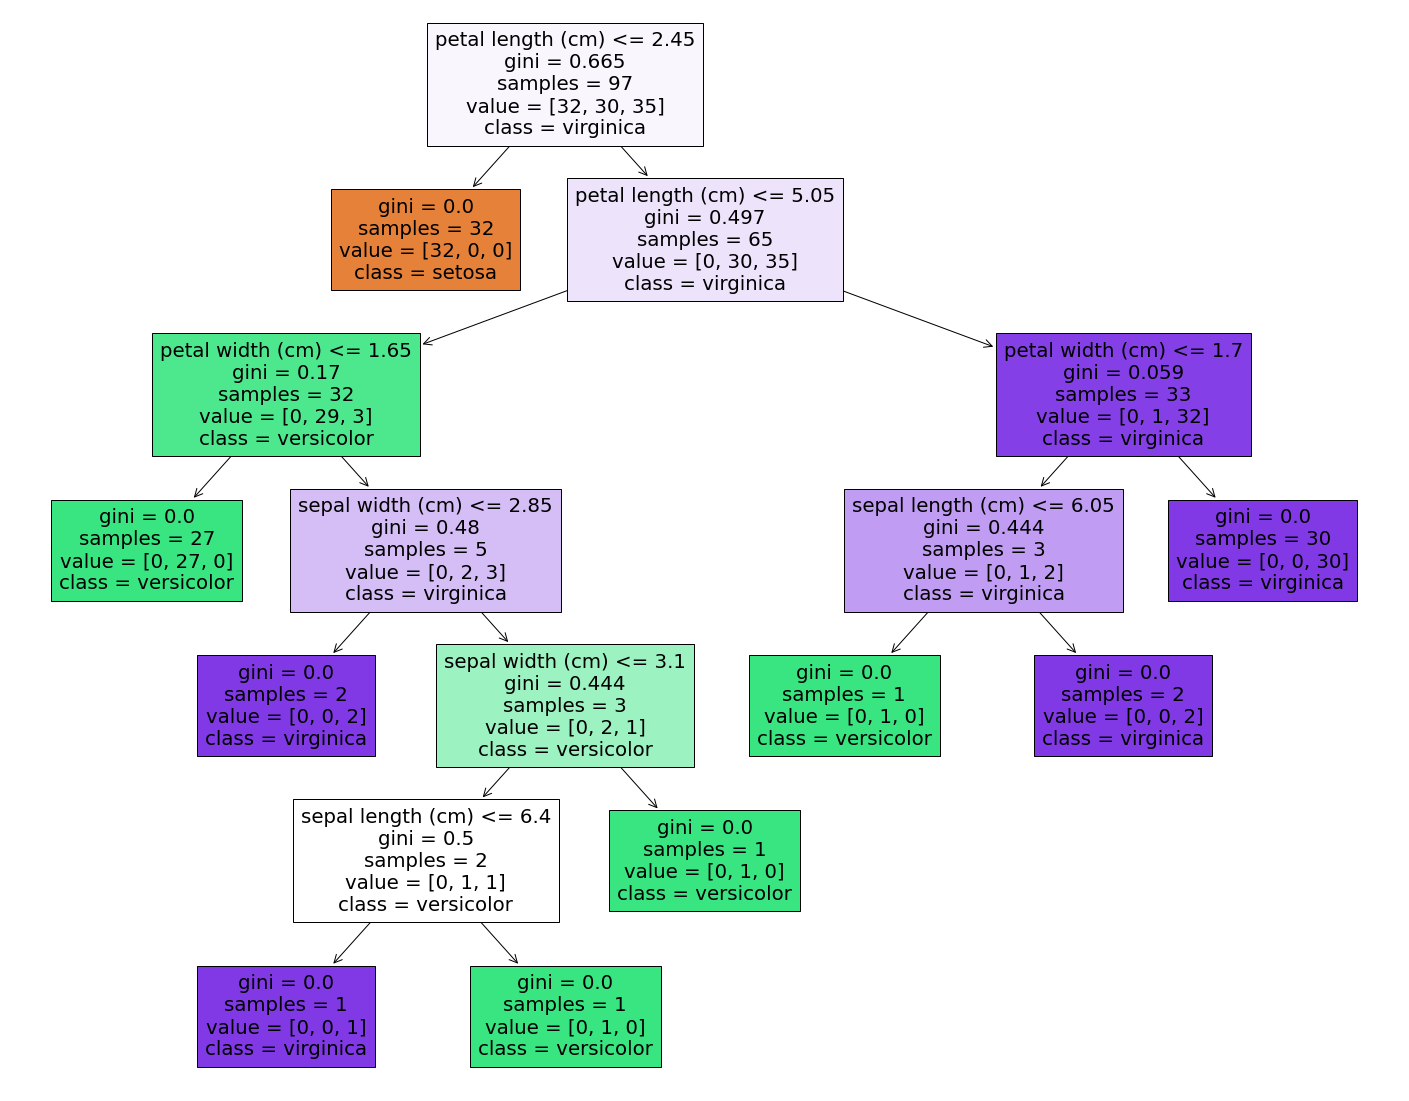

In [16]:
import matplotlib.pyplot as plt
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtree, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)